## 318 - Customizing Skew-T Diagrams: NCL-Inspired Python Plots

[Youtube](https://www.youtube.com/watch?v=3iPujH33WsI)

In [1]:
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.units import units, pandas_dataframe_to_unit_arrays

In [2]:
station = 'OUN'
date = datetime(2013, 5, 31, 12)
data = WyomingUpperAir.request_data(date, station)
data = pandas_dataframe_to_unit_arrays(data)

In [3]:
import matplotlib.pyplot as plt
from metpy.plots import SkewT

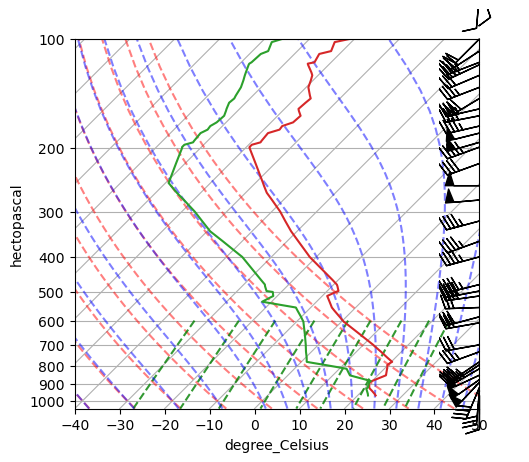

In [4]:
fig = plt.figure()
skew = SkewT(fig, rotation = 45)
skew.plot(data['pressure'], data['temperature'], color = 'tab:red')
skew.plot(data['pressure'], data['dewpoint'], color = 'tab:green')
skew.plot_barbs(data['pressure'][::2], data['u_wind'][::2], data['v_wind'][::2])
skew.plot_dry_adiabats()
skew.plot_mixing_lines()
skew.plot_moist_adiabats()

In [5]:
import metpy.calc as mpcalc
lcl_pressure, lcl_temperature = mpcalc.lcl(data['pressure'][0], data['temperature'][0], data['dewpoint'][0])
precipitable_water = mpcalc.precipitable_water(data['pressure'], data['dewpoint'])
parcel_prof = mpcalc.parcel_profile(data['pressure'], data['temperature'][0], data['dewpoint'][0])
cape, cin = mpcalc.cape_cin(data['pressure'], data['temperature'], data['dewpoint'], parcel_prof)

/tmp/ipykernel_286328/2010920008.py:4: UserWarning: Duplicate pressure(s) [23.4] hPa provided. Output profile includes duplicate temperatures as a result.
  parcel_prof = mpcalc.parcel_profile(data['pressure'], data['temperature'][0], data['dewpoint'][0])


Text(0.5, 0, 'Temperature (C)')

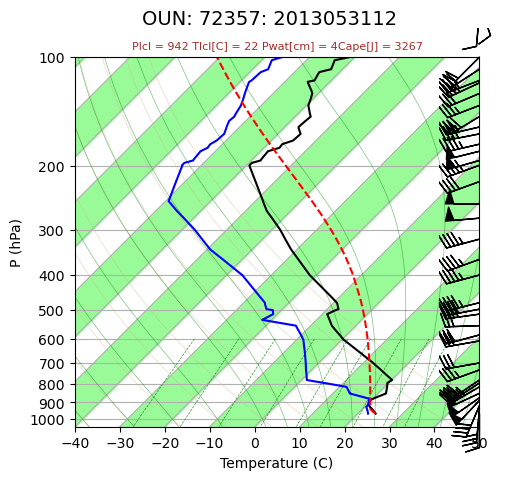

In [6]:
fig = plt.figure()
skew = SkewT(fig, rotation = 45)
skew.plot(data['pressure'], data['temperature'], color = 'k')
skew.plot(data['pressure'], data['dewpoint'], color = 'blue')
skew.plot(data['pressure'], parcel_prof, color = 'red', linestyle = '--')
skew.plot_barbs(data['pressure'][::2], data['u_wind'][::2], data['v_wind'][::2])
skew.plot_dry_adiabats(linewidth = 0.5, linestyle = '-', colors = 'tan')
skew.plot_mixing_lines(linewidth = 0.5)
skew.plot_moist_adiabats(linewidth = 0.5, linestyle = '-', colors = 'green')

for i in range(-150, 40, 10)[::2]:
    skew.ax.fill_betweenx(skew.ax.get_ylim(), i, i+10, color = 'palegreen')

plt.suptitle(f"{data['station'][0]}: {data['station_number'][0]}: {date:%Y%m%d%H}", fontsize = 14)
plt.title(f"Plcl = {lcl_pressure.m:.0f} Tlcl[C] = {lcl_temperature.m:.0f} Pwat[cm] = {precipitable_water.to('cm').m:.0f}"
          f"Cape[J] = {cape.m:.0f}", fontsize = 8, color = 'brown')

skew.ax.set_ylabel('P (hPa)')
skew.ax.set_xlabel('Temperature (C)')